In [11]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
import numpy as np

In [12]:
EPS = 7.5
MIN_POINTS = 3

In [13]:
dataframe = pd.read_csv("dbscan.csv")

In [14]:
dataframe.head()

,cluster,pt,x,y,num_neighbors,neighbors
0,NaN,0,51.418089,13.593610,2,"0,27"
1,NaN,1,39.132318,-4.419204,3,"1,40,75"
2,NaN,2,47.807515,-25.822561,1,2
3,NaN,3,27.699703,53.434193,1,3
4,NaN,4,39.860995,5.676871,3,"4,56,75"


In [15]:
visited = []
clusters = {}
noise = []
def dbscan(dataframe, minPoints):
    cluster = 0
    for index, row in dataframe.iterrows():
        neighbors = row.neighbors.split(",")
        if len(neighbors) < minPoints: 
            noise.append(index)
        else:
            clusters[cluster] = []
            expandCluster(index, neighbors, cluster)
            cluster += 1

In [16]:
def expandCluster(index, neighbors, cluster):
    while(len(neighbors) != 0):
        point = int(neighbors.pop(0))
        if point not in visited:
            visited.append(point)
            clusters[cluster].append(point)
            potential_cluster_points = (dataframe[dataframe['pt'] == point]['neighbors'].to_string().split()[1].split(","))
            neighbors.extend(potential_cluster_points)

In [17]:
dbscan(dataframe, MIN_POINTS)

In [18]:
x = list(dataframe['x'])
y = list(dataframe['y'])

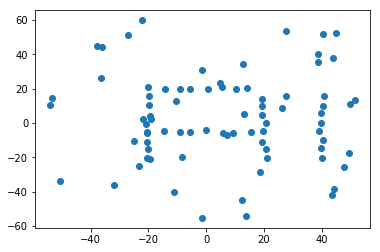

In [20]:
plt2.scatter(x,y)

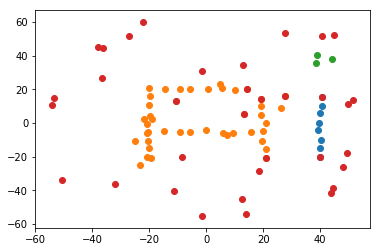

In [29]:
for cluster in clusters:
    temp_x = []
    temp_y = []
    for j in clusters[cluster]:
        temp_x.append(x[j])
        temp_y.append(y[j])
    if len(clusters[cluster]) > 0: 
        plt.scatter(temp_x, temp_y)